In [1]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
#What is the shape of the dataset?

In [5]:
df.shape

(53940, 10)

In [ ]:
# What are the data types of each column?

In [7]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [ ]:
#Are there any missing values?

In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#What are the unique values in the cut column?

In [11]:
df['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [ ]:
# What is the average price of a diamond?

In [13]:
df['price'].mean()

3932.799721913237

In [ ]:
#Which cut type has the highest average price?

In [15]:
df.groupby('cut')['price'].mean().sort_values(ascending=False)

cut
Premium      4584.257704
Fair         4358.757764
Very Good    3981.759891
Good         3928.864452
Ideal        3457.541970
Name: price, dtype: float64

In [ ]:
#How does price vary with carat?

<Axes: xlabel='carat', ylabel='price'>

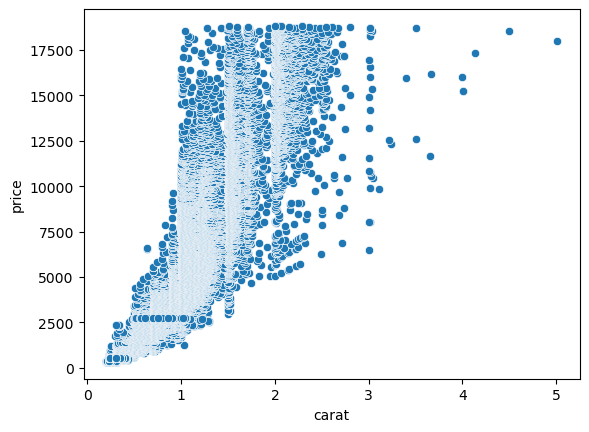

In [17]:
sns.scatterplot(data=df, x='carat', y='price')

In [ ]:
#What are the most common values in clarity?

In [19]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [ ]:
#Which color has the highest average price per carat?

In [21]:
df['price_per_carat'] = df['price'] / df['carat']
df.groupby('color')['price_per_carat'].mean().sort_values(ascending=False)

color
G    4163.411524
F    4134.730684
H    4008.026941
I    3996.402051
D    3952.564280
J    3825.649192
E    3804.611475
Name: price_per_carat, dtype: float64

In [ ]:
#Which combination of cut and clarity gives the highest average price?

In [23]:
df.groupby(['cut', 'clarity'])['price'].mean().sort_values(ascending=False).head(5)

cut        clarity
Premium    SI2        5545.936928
Fair       SI2        5173.916309
Very Good  SI2        4988.688095
Ideal      SI2        4755.952656
Good       SI2        4580.260870
Name: price, dtype: float64

In [ ]:
#Does a higher depth or table value lead to higher price?

<Axes: xlabel='depth', ylabel='price'>

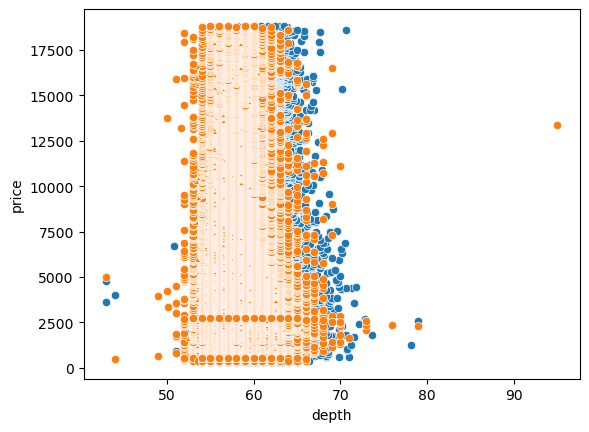

In [25]:
sns.scatterplot(data=df, x='depth', y='price')
sns.scatterplot(data=df, x='table', y='price')

In [ ]:
#Create a new feature volume and check its impact on price.

<Axes: xlabel='volume', ylabel='price'>

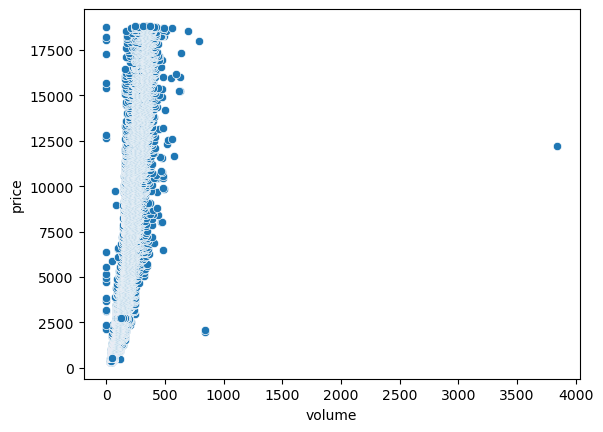

In [27]:
df['volume'] = df['x'] * df['y'] * df['z']
sns.scatterplot(data=df, x='volume', y='price')